# Predict Homework Grades Using a Classification Decision Tree

In [3]:
import pandas as pd
import numpy as np

### Data Validation

In [26]:
#previewing the data
filename = 'student-por.csv'
data = pd.read_csv(filename, sep=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [71]:
#choosing the 9 features to use
column = ['school', 'age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'paid', 'freetime']

In [49]:
#checking which features are not numerical
data.dtypes

In [60]:
#check the values of the categorical columns
cat_columns = ('school', 'Mjob', 'Fjob', 'paid')
for i in cat_columns:
    print(data[i].value_counts())

GP    423
MS    226
Name: school, dtype: int64
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64
no     610
yes     39
Name: paid, dtype: int64


In [87]:
#replace all the categorical values with numerical values
data['school'] = data['school'].replace(['GP', 'MS'], [0,1])
data['Mjob'] = data['Mjob'].replace(['other', 'services', 'at_home', 'teacher', 'health'], [0,1,2,3,4])
data['Fjob'] = data['Fjob'].replace(['other', 'services', 'at_home', 'teacher', 'health'], [0,1,2,3,4])
data['paid'] = data['paid'].replace(['no', 'yes'], [0,1])

data[column]

,school,age,Medu,Fedu,Mjob,Fjob,studytime,paid,freetime
0,0,18,4,4,2,3,2,0,3
1,0,17,1,1,2,0,2,0,3
2,0,15,1,1,2,0,2,0,3
3,0,15,4,2,4,1,3,0,2
4,0,16,3,3,0,0,2,0,3
...,...,...,...,...,...,...,...,...,...
644,1,19,2,3,1,0,3,0,4
645,1,18,3,1,3,1,2,0,3
646,1,18,1,1,0,0,2,0,1
647,1,17,3,1,1,1,1,0,4


### Data Cleaning

In [88]:
#checking the features for any missing values
for i in column: 
    missing = pd.isnull(data[i]).sum()
    print(f'{missing} missing entries in {i}')

0 missing entries in school
0 missing entries in age
0 missing entries in Medu
0 missing entries in Fedu
0 missing entries in Mjob
0 missing entries in Fjob
0 missing entries in studytime
0 missing entries in paid
0 missing entries in freetime


### Training and Testing the Decision Tree

I  decided to use a Classifier Decision Tree instead of a Regressor Decision Tree because the project did not work with floating numbers. 

In [155]:
from sklearn.model_selection import train_test_split
from sklearn import tree
#feature sizes that will be used
feature_size = [3, 6, 9, 12, 15]
acc_list = []

for i in feature_size: 
    #stores column data in X and G3 data in y
    X,y = data[column[0:i]], data['G3'] 
    #splits them into training and test splits
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    
    num_nodes = [5, 10, 15, 20, 25]

    #creates a Classifier Decision Tree
    for j in num_nodes:
        clf = tree.DecisionTreeClassifier(max_leaf_nodes=j)
        clf = clf.fit(X_train, y_train)

        #makes predictions
        prediction = clf.predict(X_test)
        correct = 0

        #pairs the indexes of the prediction and y_tests lists
        #keeps tract of correct predictions to the true values
        for pred, true in zip(prediction, y_test):
            if pred == true:
                correct += 1

        #divides correct predictions with amount of indexes to get accuracy
        accuracy = correct / len(y_test)
        acc_list.append(accuracy)
        print(f'Features: {i} Nodes: {j} Accuracy: {accuracy}')

Features: 3 Nodes: 5 Accuracy: 0.2085889570552147
Features: 3 Nodes: 10 Accuracy: 0.22085889570552147
Features: 3 Nodes: 15 Accuracy: 0.19631901840490798
Features: 3 Nodes: 20 Accuracy: 0.17177914110429449
Features: 3 Nodes: 25 Accuracy: 0.17177914110429449
Features: 6 Nodes: 5 Accuracy: 0.12269938650306748
Features: 6 Nodes: 10 Accuracy: 0.1656441717791411
Features: 6 Nodes: 15 Accuracy: 0.1656441717791411
Features: 6 Nodes: 20 Accuracy: 0.15950920245398773
Features: 6 Nodes: 25 Accuracy: 0.15337423312883436
Features: 9 Nodes: 5 Accuracy: 0.17177914110429449
Features: 9 Nodes: 10 Accuracy: 0.1901840490797546
Features: 9 Nodes: 15 Accuracy: 0.17177914110429449
Features: 9 Nodes: 20 Accuracy: 0.1656441717791411
Features: 9 Nodes: 25 Accuracy: 0.13496932515337423
Features: 12 Nodes: 5 Accuracy: 0.1656441717791411
Features: 12 Nodes: 10 Accuracy: 0.15337423312883436
Features: 12 Nodes: 15 Accuracy: 0.13496932515337423
Features: 12 Nodes: 20 Accuracy: 0.1656441717791411
Features: 12 Nodes:

<function matplotlib.pyplot.show(close=None, block=None)>

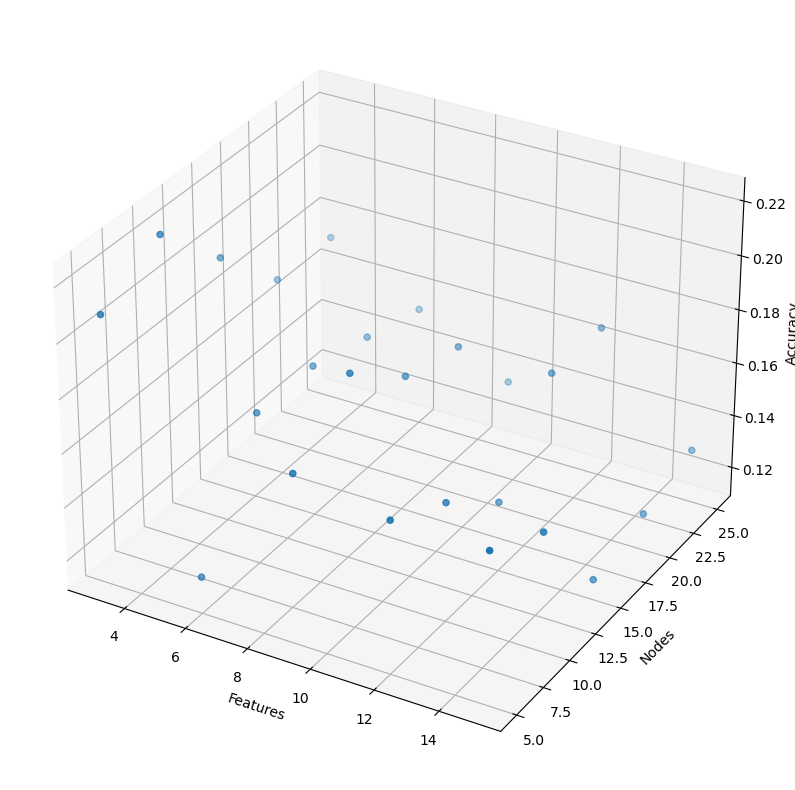

In [157]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#creates a 3D figure 
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
#plots the points with x as features, y as nodes, and z as accuracy
x = [3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 12, 12, 12, 12, 12, 15, 15, 15, 15, 15]
y = [5, 10, 15, 20, 25, 5, 10, 15, 20, 25, 5, 10, 15, 20, 25, 5, 10, 15, 20, 25, 5, 10, 15, 20, 25]
z = acc_list
#labels the x, y, and z axis
ax.set_xlabel('Features')
ax.set_ylabel('Nodes')
ax.set_zlabel('Accuracy')
ax.scatter3D(x, y, z)
plt.show

### Summary
    
There is a slight correlation between the size of the tree and how accurate the decision tree was at predicting the target value. By looking at the graph, it is apparent that a smaller tree produces more accurate results. However, the change in features is much more noticeable. Using fewer features causes the decision tree to be more accurate, specifically the features of school, age, and Medu. 

Throughout this process, I realized that decision trees do not always require a large amount of data. Rather, it is more important that the data that the decision tree is trained on is relevant to the purpose of the project. In my case, I believe the features of "school" and "age" had a much larger effect on the outcome of grades compared to the other features. The unproportional effect of these features was evident when the accuracy diminished when I added other features. It seemed as if more unrelated features diluted the accuracy of the decision tree. Regardless, it was interesting to see how important "school" and "age" were to predict the accuracy of grades in this data set. 